In [1]:
import swiftest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
swiftersim = swiftest.Simulation(param_file=inparfile, codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 3.650e+02
Creating Dataset
Successfully converted 366 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
inparfile = 'param.swiftest.in'
swiftestsim = swiftest.Simulation(param_file=inparfile)
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 366 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['xhx']**2 + swiftdiff['xhy']**2 + swiftdiff['xhz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vhx']**2 + swiftdiff['vhy']**2 + swiftdiff['vhz']**2)

In [6]:
plidx = swiftdiff.id.values[swiftdiff.id.values <= 8]
tpidx = swiftdiff.id.values[swiftdiff.id.values > 8]

In [7]:
swiftdiff.sel(id=tpidx)['xhx'].isel(time=1)

<xarray.DataArray 'xhx' (id: 16)>
array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00484658, -0.00484491,  0.        , -0.00211506,  0.        ,
        0.        ])
Coordinates:
  * id       (id) int64 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
    time     float64 1.0

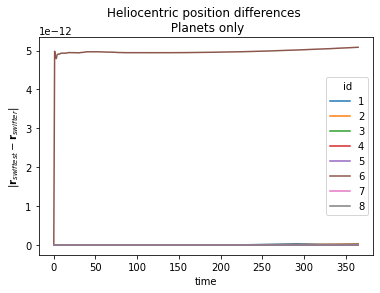

In [8]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("symba_swifter_comparison-8pl-16tp-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

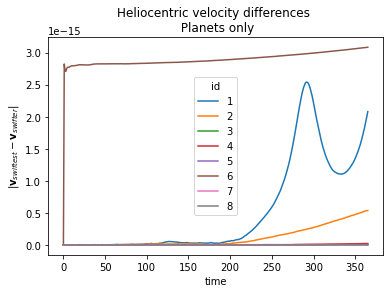

In [9]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("symba_swifter_comparison-8pl-16tp-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


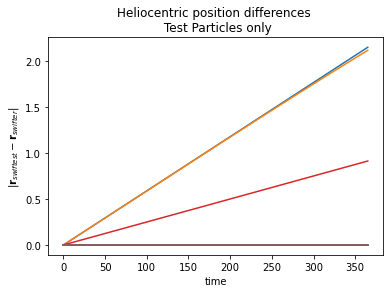

In [10]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("symba_swifter_comparison-8pl-16tp-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


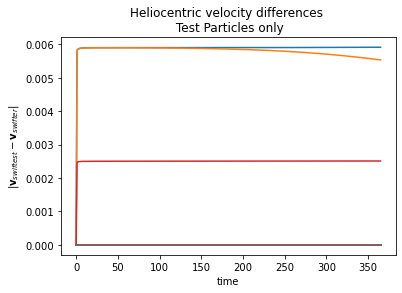

In [11]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("symba_swifter_comparison-8pl-16tp-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)